# 2. Inferential Statistics

Inferential statistics is a branch of statistics that involves using sample data to make inferences or predictions about a population. It allows researchers to draw conclusions and make generalizations based on limited information collected from a subset of the population.

**Here are some key concepts and techniques used in inferential statistics:**

##### 2.1 Population and Sample:

- In statistics, the population refers to the entire group of individuals or objects that we are interested in studying.

- A sample is a subset of the population that is selected for study. It is often impractical or impossible to study the entire population, so researchers use samples to make inferences about the population.

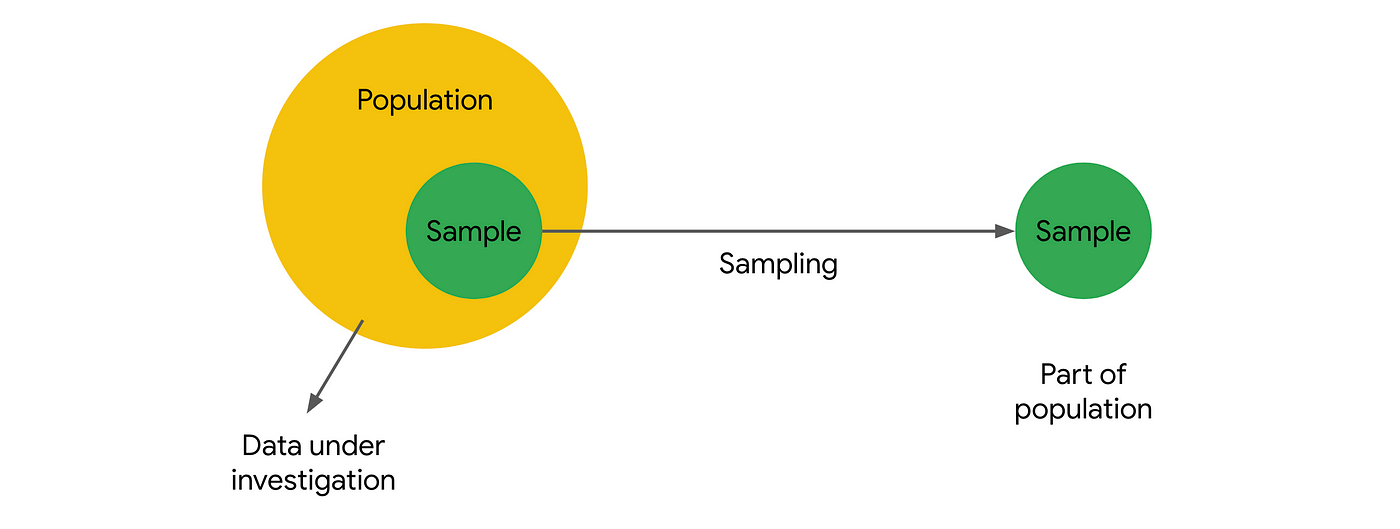


##### 2.2 Sampling Methods:

Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined.

Various sampling methods, such as simple random sampling, stratified sampling, cluster sampling, and systematic sampling, are used to select representative samples from the population.

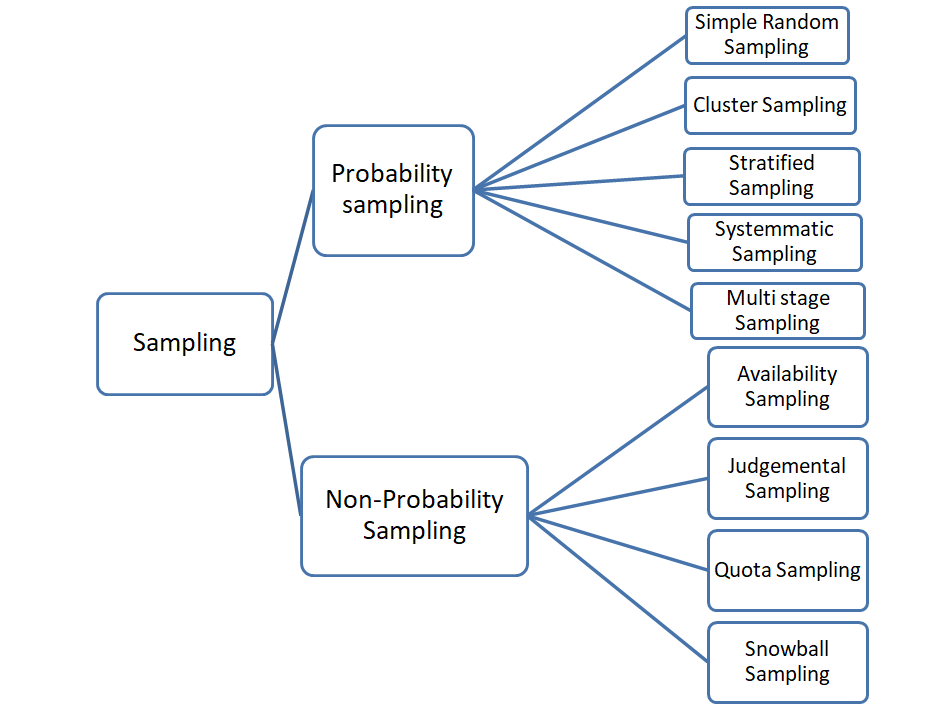

**Probability Sampling:** In probability sampling, every element of the population has an equal chance of being selected. Probability sampling gives us the best chance to create a sample that is truly representative of the population.


**Non-Probability Sampling:** In non-probability sampling, all elements do not have an equal chance of being selected. Consequently, there is a significant risk of ending up with a non-representative sample which does not produce generalizable results

In [1]:
import random

# Define the population
population = list(range(1, 101))  # Example population of numbers from 1 to 100

# Define the sample size
sample_size = 20  # Example sample size

# Perform simple random sampling
sample = random.sample(population, sample_size)

# Print the sample
print("Random Sample:", sample)

Random Sample: [33, 55, 2, 74, 47, 82, 72, 94, 99, 27, 95, 8, 61, 84, 93, 69, 15, 52, 53, 57]


**Implement with DataFrame**

In [2]:
import pandas as pd
import random

# Create a DataFrame
data = {
    'ID': range(1, 101),  # Example ID numbers
    'Age': [random.randint(18, 60) for _ in range(100)],  # Example ages
    'Gender': [random.choice(['Male', 'Female']) for _ in range(100)]  # Example genders
}

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

# Implement simple random sampling
sample_size = 20  # Example sample size
sample = df.sample(n=sample_size, random_state=1)  # Perform simple random sampling

# Display the sampled DataFrame
print("\nSampled DataFrame:")
print(sample)

Original DataFrame:
   ID  Age  Gender
0   1   18    Male
1   2   22    Male
2   3   18  Female
3   4   28    Male
4   5   40    Male

Sampled DataFrame:
    ID  Age  Gender
80  81   38  Female
84  85   43    Male
33  34   45  Female
81  82   22    Male
93  94   56    Male
17  18   38    Male
36  37   48    Male
82  83   25    Male
69  70   18  Female
65  66   49  Female
92  93   27    Male
39  40   51    Male
56  57   35    Male
52  53   40  Female
51  52   35    Male
32  33   51    Male
31  32   52  Female
44  45   57    Male
78  79   34    Male
10  11   56    Male


In [4]:
print(df.sample(5))

    ID  Age  Gender
24  25   23  Female
25  26   37    Male
11  12   35  Female
27  28   32  Female
12  13   32    Male


In [5]:
print(df.shape)

(100, 3)


##### Confidence Intervals:

Confidence intervals provide a range of values within which the true population parameter is likely to lie, based on sample data and a specified level of confidence (e.g., 95% confidence interval).

- Confidence Interval is a type of estimate computed from the statistics of the observed data which gives a range of values that’s likely to contain a population parameter with a particular level of confidence.


- A confidence interval for the mean is a range of values between which the population mean possibly lies.

In [6]:
#Method to calculate C.I
import numpy as np
import scipy.stats


def mean_confidence_interval(df, confidence=0.95):
    a = 1.0 * np.array(df)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [8]:
mean_confidence_interval(df['Age'], confidence=0.95)

(37.27, 34.81787113877769, 39.722128861222316)

In [9]:
#In-built function to calculate C.I
import statsmodels.api as sm
sm.stats.DescrStatsW(df['Age']).zconfint_mean()

(34.847843365468336, 39.69215663453167)

- **Point estimate:** This is the estimate of the population parameter based on sample data. In your case, the point estimate is 37.27.


- **Lower bound:** This is the lower limit of the confidence interval. It represents the lowest likely value of the population parameter within the interval. In your case, the lower bound is 34.81787113877769.


- **Upper bound:** This is the upper limit of the confidence interval. It represents the highest likely value of the population parameter within the interval. In your case, the upper bound is 39.722128861222316.


The confidence interval indicates that we are, for example, 95% confident that the true population parameter (e.g., population mean) falls between the lower and upper bounds, given the sample data and the statistical method used to compute the interval.

### Z-Score

The Z-score, also known as the standard score, is a statistical measurement that indicates how many standard deviations a data point is from the mean of the dataset. It's calculated using the formula:


Z= 
(X−μ)/σ

 

Where:

- Z is the Z-score.

- X is the individual data point.

- μ is the mean of the dataset.

- σ is the standard deviation of the datase

In [10]:
def calculate_z_score(x, mean, std_dev):
    """
    Calculate the Z-score of a data point.
    
    Arguments:
    x : float : Data point
    mean : float : Mean of the dataset
    std_dev : float : Standard deviation of the dataset
    
    Returns:
    float : Z-score of the data point
    """
    z_score = (x - mean) / std_dev
    return z_score

# Example data
data = [10, 15, 20, 25, 30]
mean = sum(data) / len(data)  # Calculate the mean
std_dev = (sum((x - mean) ** 2 for x in data) / len(data)) ** 0.5  # Calculate the standard deviation

# Calculate Z-scores for each data point
z_scores = [calculate_z_score(x, mean, std_dev) for x in data]

# Print the Z-scores
for i, x in enumerate(data):
    print(f"Data point: {x}, Z-score: {z_scores[i]}")

Data point: 10, Z-score: -1.414213562373095
Data point: 15, Z-score: -0.7071067811865475
Data point: 20, Z-score: 0.0
Data point: 25, Z-score: 0.7071067811865475
Data point: 30, Z-score: 1.414213562373095


##### Analysis

- For a data point of 10, the Z-score is approximately -1.41.
- For a data point of 15, the Z-score is approximately -0.71.
- For a data point of 20, the Z-score is 0.
- For a data point of 25, the Z-score is approximately 0.71.
- For a data point of 30, the Z-score is approximately 1.41.

**Interpreting Z-scores:**

- A Z-score of 0 indicates that the data point is exactly at the mean of the dataset.
- A positive Z-score indicates that the data point is above the mean of the dataset.
- A negative Z-score indicates that the data point is below the mean of the dataset.


Additionally, the magnitude of the Z-score indicates how many standard deviations the data point is from the mean. In your dataset, a Z-score of 1 indicates that the data point is one standard deviation away from the mean.

## P-Value

The p-value is a measure used in statistical hypothesis testing to determine the strength of evidence against the null hypothesis. It quantifies the probability of obtaining the observed results, or more extreme results, assuming that the null hypothesis is true.

**How you can calculate the p-value for a Z-score**

In [11]:
from scipy.stats import norm

def calculate_p_value(z_score):
    """
    Calculate the p-value for a given Z-score.
    
    Arguments:
    z_score : float : Z-score
    
    Returns:
    float : p-value
    """
    p_value = norm.cdf(z_score)  # Calculate the cumulative distribution function (CDF) for the Z-score
    return p_value

# Example Z-score
z_score = 1.96  # Example Z-score

# Calculate the p-value
p_value = calculate_p_value(z_score)

print("Z-score:", z_score)
print("p-value:", p_value)

Z-score: 1.96
p-value: 0.9750021048517795


##### Analysis of p-value:

- The p-value represents the probability of observing a Z-score less extreme than the observed Z-score, assuming that the null hypothesis is true.

- In this case, with a p-value of 0.975, it means that there is a 97.5% probability of observing a Z-score less extreme than 1.96 under the assumption that the null hypothesis is true.

- Another way to interpret this is that the observed Z-score of 1.96 is quite high on the distribution, with only 2.5% of the distribution being more extreme.

**In hypothesis testing:**

- If the p-value is less than a chosen significance level (commonly 0.05), the null hypothesis is rejected.

- If the p-value is greater than the chosen significance level, there is insufficient evidence to reject the null hypothesis.

Given the p-value of 0.975 for a Z-score of 1.96, if the significance level is set at 0.05, we would fail to reject the null hypothesis because the p-value is greater than the significance level.

## ANOVA (Analysis of Variance):

ANOVA is a statistical technique used to compare means across multiple groups or treatments to determine whether there are significant differences between them.

- ANOVA is a word coined from ‘Analysis of Variance’. It is a statistical concept that shows the differences between the means of more than two independent groups, using variance analysis on samples from those groups.


- It is used for checking the contrast between three or more samples with one test. Especially when the categorical class has over two categories.


- During ANOVA testing, the hypothesis is:
    - 1. H0: When all samples’ means are the same.
    - 2. H1: When one or more samples are very much different.

In [13]:
import pandas as pd
from scipy.stats import f_oneway

# Example data for different groups
group1 = [21, 22, 23, 24, 25]
group2 = [18, 20, 21, 22, 24]
group3 = [19, 20, 21, 23, 24]

# One-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)
print("One-way ANOVA:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

One-way ANOVA:
F-statistic: 1.4237288135593222
p-value: 0.2787243485848909


**Here how to interpret the results:**

- **F-statistic:** The F-statistic is a test statistic used in ANOVA that measures the ratio of the variance between groups to the variance within groups. It indicates whether there are significant differences in the means of the groups.


- **p-value:** The p-value associated with the F-statistic is the probability of observing the data given that the null hypothesis is true. In the context of ANOVA, a low p-value suggests that there is strong evidence against the null hypothesis, indicating that at least one group mean is significantly different from the others.

**Interpreting the results:**

- In your case, the F-statistic is approximately 1.42, and the p-value is approximately 0.279.


- With a p-value of 0.279, we fail to reject the null hypothesis at a significance level of 0.05 (or any reasonable significance level). This suggests that there is not enough evidence to conclude that there are significant differences in means between the groups.


- In other words, the data does not provide sufficient evidence to conclude that the means of the groups are different from each other.

In [15]:
# Two-way ANOVA
# Example data for two factors (treatments) with different levels
factor1 = ['A'] * 5 + ['B'] * 5 + ['C'] * 5
factor2 = ['X'] * 3 + ['Y'] * 3 + ['Z'] * 3 + ['X'] * 2 + ['Y'] * 2 + ['Z'] * 2
response = group1 + group2 + group3

data = {'factor1': factor1, 'factor2': factor2, 'response': response}

df = pd.DataFrame(data)

# Perform Two-way ANOVA using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('response ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-way ANOVA:")
print(anova_table)


Two-way ANOVA:
                        sum_sq   df          F    PR(>F)
C(factor1)             11.9125  2.0   7.580682  0.017712
C(factor2)              2.0250  2.0   1.288636  0.293669
C(factor1):C(factor2)  40.6875  4.0  12.946023  0.002379
Residual                5.5000  7.0        NaN       NaN


c:\application\anaconda\envs\bigmart\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


**Interpreting the results:**

- For **C(factor1):** The F-statistic is 7.58 with a p-value of 0.018. This indicates that there is a significant effect of factor 1 on the response variable.


- For **C(factor2):** The F-statistic is 1.29 with a p-value of 0.294. This suggests that there is no significant effect of factor 2 on the response variable.


- For **C(factor1):C(factor2)** (interaction effect): The F-statistic is 12.95 with a p-value of 0.002. This indicates that there is a significant interaction effect between factor 1 and factor 2.


The **Residual** row provides information about unexplained variation in the data.


**In summary, based on the results of the two-way ANOVA:**

- Factor 1 has a significant effect on the response variable.


- Factor 2 does not have a significant effect on the response variable.


- There is a significant interaction effect between factor 1 and factor 2.

#### Correlation analysis 

Correlation analysis is used to measure the strength and direction of the linear relationship between two continuous variables. In Python, you can use the corr() function from the pandas library to compute the correlation coefficient between variables. 

Interpreting correlation analysis involves understanding the strength and direction of the relationship between two continuous variables. The correlation coefficient, typically denoted as  r, measures the degree of linear association between the variables. 

**Here's a simple implementation:**

In [16]:
import pandas as pd

# Example data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 4, 6, 8, 10]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract the correlation coefficient between X and Y
correlation_coefficient = correlation_matrix.loc['X', 'Y']
print("\nCorrelation Coefficient between X and Y:", correlation_coefficient)

Correlation Matrix:
     X    Y
X  1.0  1.0
Y  1.0  1.0

Correlation Coefficient between X and Y: 1.0


**Here's how to interpret correlation analysis results:**

**1. Magnitude of the Correlation Coefficient (r):**

- The correlation coefficient ranges from -1 to 1.

- A value of 1 indicates a perfect positive linear relationship, where the variables increase together in a linear fashion.

- A value of -1 indicates a perfect negative linear relationship, where one variable increases as the other decreases linearly.

- A value of 0 indicates no linear relationship between the variables.

**2. Direction of the Relationship:**

- If r>0, it indicates a positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

- If r<0, it indicates a negative correlation, meaning that as one variable increases, the other variable tends to decrease.

- The closer r is to 0, the weaker the linear relationship between the variables.

**3. Strength of the Relationship:**

- The strength of the correlation depends on the absolute value of r.

- Typically, correlations with absolute values between 0.8 and 1.0 (or -0.8 and -1.0) are considered very strong.

- Correlations between 0.6 and 0.8 (or -0.6 and -0.8) are considered strong.

- Correlations between 0.4 and 0.6 (or -0.4 and -0.6) are considered moderate.

- Correlations between 0.2 and 0.4 (or -0.2 and -0.4) are considered weak.

- Correlations below 0.2 (or above -0.2) are considered very weak or negligible.

## Nonparametric Statistics

Nonparametric statistics are used when the data does not meet the assumptions of parametric tests, such as normality or homogeneity of variance. These methods make fewer assumptions about the population distribution and are often used with ordinal or non-normally distributed data.

##### 1. Mann-Whitney U Test:

- The Mann-Whitney U test compares the median of two independent groups.

- It is used when the data is ordinal or not normally distributed.

- Implementation using scipy.stats:

**Here's how to interpret these results:**

- **U-statistic:** The U-statistic is a value computed by the Mann-Whitney U test. It represents the smaller of the U values for the two groups being compared. The U value is the sum of ranks given to observations in one of the groups. It is used to rank the combined data from both groups.

- **p-value:** The p-value associated with the Mann-Whitney U test is a measure of the strength of evidence against the null hypothesis. It represents the probability of observing a test statistic as extreme as, or more extreme than, the one obtained from the sample data, assuming that the null hypothesis is true.

In [17]:
from scipy.stats import mannwhitneyu

# Example data for two independent groups
group1 = [13, 15, 16, 17, 20]
group2 = [10, 12, 14, 15, 18]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)
print("Mann-Whitney U Test:")
print("U-statistic:", stat)
print("p-value:", p_value)

Mann-Whitney U Test:
U-statistic: 6.5
p-value: 0.12457631929096341


**Now, interpreting the results:**

- With a p-value of approximately 0.1246, if we use a significance level (alpha) of 0.05, we fail to reject the null hypothesis.
- This suggests that there is not enough evidence to conclude that there is a significant difference between the medians of the two groups.

**Note:** Based on the data and the test conducted, we do not have sufficient evidence to say that one group tends to have higher values than the other.

##### 2. Wilcoxon Signed-Rank Test:

- The Wilcoxon signed-rank test compares the median of paired samples.
- It is used when the data is ordinal or not normally distributed.
- Implementation using scipy.stats:

**Here's how to interpret these results:**

- **Test Statistic:** In the Wilcoxon Signed-Rank Test, the test statistic represents the sum of the ranks of the positive differences between paired observations.

    - A test statistic of 0.0 suggests that there were no positive differences between the paired observations.

- **p-value:** The p-value associated with the Wilcoxon Signed-Rank Test represents the probability of obtaining a test statistic as extreme as, or more extreme than, the one observed from the sample data, assuming that the null hypothesis (no difference between paired observations) is true.

In [18]:
from scipy.stats import wilcoxon

# Example data for paired samples
before = [25, 30, 32, 28, 24]
after = [20, 28, 30, 26, 22]

# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(before, after)
print("Wilcoxon Signed-Rank Test:")
print("Test statistic:", stat)
print("p-value:", p_value)

Wilcoxon Signed-Rank Test:
Test statistic: 0.0
p-value: 0.0625


**Interpreting the results:**

- With a p-value of approximately 0.0625, if we use a significance level (alpha) of 0.05, we fail to reject the null hypothesis.
- This suggests that there is not enough evidence to conclude that there is a significant difference between the paired observations.

**Note:** Based on the data and the test conducted, we do not have sufficient evidence to say that there is a significant change or difference between the paired observations.

##### 3. Kruskal-Wallis H Test:

- The Kruskal-Wallis H test compares the median of two or more independent groups.
- It is the nonparametric alternative to the one-way ANOVA.
- Implementation using scipy.stats:

**Here's how to interpret these results:**

- **H-statistic:** The H-statistic is a value computed by the Kruskal-Wallis H Test. It measures the degree of difference among the medians of the groups being compared. It is analogous to the F-statistic in one-way ANOVA.

    - A larger H-statistic indicates greater variability among the group medians.

- **p-value:** The p-value associated with the Kruskal-Wallis H Test is a measure of the strength of evidence against the null hypothesis. It represents the probability of observing a test statistic as extreme as, or more extreme than, the one obtained from the sample data, assuming that the null hypothesis is true.

In [19]:
from scipy.stats import kruskal

# Example data for multiple independent groups
group1 = [10, 12, 14, 16, 18]
group2 = [13, 15, 17, 19, 21]
group3 = [11, 13, 15, 17, 19]

# Perform Kruskal-Wallis H test
stat, p_value = kruskal(group1, group2, group3)
print("Kruskal-Wallis H Test:")
print("H-statistic:", stat)
print("p-value:", p_value)

Kruskal-Wallis H Test:
H-statistic: 2.074820143884894
p-value: 0.3543712906195395


**interpreting the results:**

- With a p-value of approximately 0.3544, if we use a significance level (alpha) of 0.05, we fail to reject the null hypothesis.

- This suggests that there is not enough evidence to conclude that there is a significant difference among the medians of the groups.



**Note:** Based on the data and the test conducted, we do not have sufficient evidence to say that at least one of the groups has a median different from the others.

### Probability Distributions:

Probability distributions are mathematical functions that describe the probabilities of possible outcomes in a random process. Different types of probability distributions are used to model various real-world phenomena and statistical processes. 

**1.Uniform Distribution:**

- In a uniform distribution, all outcomes are equally likely.
- The probability density function (PDF) is constant within a certain range and zero outside that range.
- **Example:** Rolling a fair six-sided die.


**2. Normal Distribution (Gaussian Distribution):**

- The normal distribution is symmetric and bell-shaped.
- It is characterized by its mean (μ) and standard deviation (σ).
- Many natural phenomena follow a normal distribution.
- **Example:** Heights and weights of individuals in a population.


**3. Binomial Distribution:**

- The binomial distribution models the number of successes in a fixed number of independent Bernoulli trials.
- It is characterized by the number of trials (n) and the probability of success (p).
- **Example:** Flipping a biased coin multiple times and counting the number of heads.


**4. Poisson Distribution:**

- The Poisson distribution models the number of events occurring in a fixed interval of time or space.
- It is characterized by the average rate of occurrence (λ).
- **Example:** Number of calls received by a call center in an hour.


**5. Exponential Distribution:**

- The exponential distribution models the time between successive events in a Poisson process.
- It is characterized by the rate parameter (λ).
- **Example:** Time until the next customer arrives at a service point.


**6. Geometric Distribution:**

- The geometric distribution models the number of trials needed to achieve the first success in a sequence of independent Bernoulli trials.
- It is characterized by the probability of success (p).
- **Example:** Number of coin flips needed to get the first head.


**7. Chi-Squared Distribution:**

- The chi-squared distribution is the distribution of the sum of the squares of independent standard normal random variables.
- It arises in various statistical tests, such as the chi-squared test for independence and the chi-squared test for goodness of fit.

### Regression analysis

Regression analysis is a statistical method used to model the relationship between one or more independent variables and a dependent variable. It helps in understanding how changes in the independent variables are associated with changes in the dependent variable.

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [21]:
# Sample data
X = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y = np.array([2, 3, 4, 5, 6])  # Dependent variable

In [22]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
# Print the coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 1.0
Slope: 1.0


In [24]:
# Predictions
y_pred = model.predict(X)

In [25]:
y_pred

array([2., 3., 4., 5., 6.])

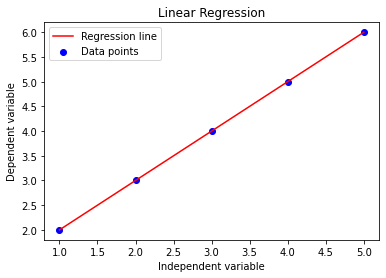

In [26]:
# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Happy Learning!